In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [5]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:

no_aug_datagen = ImageDataGenerator()

In [8]:

aug_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:

batch_size = 128
train_generator_no_aug = no_aug_datagen.flow(x_train, y_train, batch_size=batch_size)
train_generator_aug = aug_datagen.flow(x_train, y_train, batch_size=batch_size)

In [10]:

def build_cnn():
    return Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

In [11]:

model_no_aug = build_cnn()
model_no_aug.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_no_aug = model_no_aug.fit(
    train_generator_no_aug,
    epochs=10,
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // batch_size
)

Epoch 1/10


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.7197 - loss: 0.7949 - val_accuracy: 0.8533 - val_loss: 0.4078
Epoch 2/10
  1/468 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8750 - loss: 0.3328

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 0.3328 - val_accuracy: 0.8547 - val_loss: 0.4083
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8710 - loss: 0.3622 - val_accuracy: 0.8771 - val_loss: 0.3461
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.4000 - val_accuracy: 0.8797 - val_loss: 0.3434
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.8875 - loss: 0.3092 - val_accuracy: 0.8899 - val_loss: 0.3170
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8828 - loss: 0.3421 - val_accuracy: 0.8881 - val_loss: 0.3213
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8997 - loss: 0.2756 - val_accuracy: 0.8956 - val_loss: 0.2889
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9453 - loss: 0.2098 - val_accuracy: 0.8947 - val_loss: 0.2911
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9097 - loss: 0.2471 - val_accuracy: 0.896

In [12]:

model_aug = build_cnn()
model_aug.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_aug = model_aug.fit(
    train_generator_aug,
    epochs=10,
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // batch_size
)

Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.6239 - loss: 1.0424 - val_accuracy: 0.7934 - val_loss: 0.5534
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7656 - loss: 0.6689 - val_accuracy: 0.7972 - val_loss: 0.5583
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.7797 - loss: 0.5850 - val_accuracy: 0.8398 - val_loss: 0.4420
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.5629 - val_accuracy: 0.8337 - val_loss: 0.4613
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.8062 - loss: 0.5145 - val_accuracy: 0.8385 - val_loss: 0.4336
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8359 - loss: 0.4489 - val_accuracy: 0.8370 - val_loss: 0.4348
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.8254 - loss: 0.4644 - val_accuracy: 0.8525 - val_loss: 0.3969
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7891 - loss: 0.4900 - val_accu

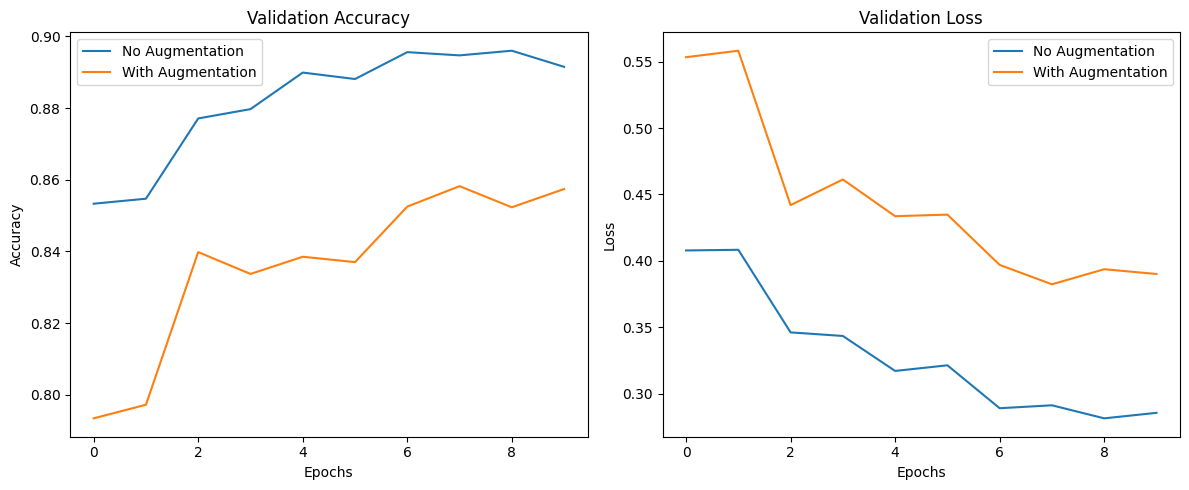

In [13]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_no_aug.history['val_accuracy'], label='No Augmentation')
plt.plot(history_aug.history['val_accuracy'], label='With Augmentation')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_no_aug.history['val_loss'], label='No Augmentation')
plt.plot(history_aug.history['val_loss'], label='With Augmentation')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:

print("\n--- Key Observations ---")
print("1. Augmentation typically reduces overfitting (gap between train/val accuracy).")
print("2. Augmented model may start slower but often generalizes better.")
print("3. Final val accuracy comparison:")
print(f"   - No Augmentation: {max(history_no_aug.history['val_accuracy']):.4f}")
print(f"   - With Augmentation: {max(history_aug.history['val_accuracy']):.4f}")


--- Key Observations ---
1. Augmentation typically reduces overfitting (gap between train/val accuracy).
2. Augmented model may start slower but often generalizes better.
3. Final val accuracy comparison:
   - No Augmentation: 0.8960
   - With Augmentation: 0.8582


In [15]:

sample_images = x_test[:5]
sample_labels = np.argmax(y_test[:5], axis=1)

In [16]:

pred_no_aug = np.argmax(model_no_aug.predict(sample_images), axis=1)
pred_aug = np.argmax(model_aug.predict(sample_images), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


In [17]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

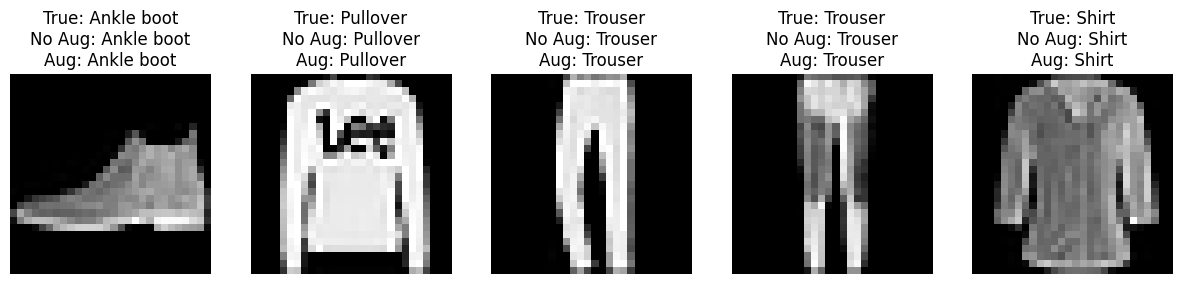

In [18]:

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[sample_labels[i]]}\nNo Aug: {class_names[pred_no_aug[i]]}\nAug: {class_names[pred_aug[i]]}")
    plt.axis('off')
plt.show()